# The second CNN
<b> Load the balanced and encoded data from the from the pickled DataFrame</b>

In [4]:
import pickle
import pandas as pd
import numpy as np

df_balanced = pickle.load( open("df_balanced_enc.pickle", "rb") )
#df_balanced

<b> Create a 80/20 train test split. You can use only the column with the one hot encoded sequences</b>

In [5]:
from sklearn.model_selection import train_test_split


### fix the random seed with 42 or another value for XXXX and set the test and Training split in YYYY

rnd_seed=XXXX
xTrain, xTest, yTrain, yTest = train_test_split( df_balanced.seq_oh_pad, df_balanced.lbl_num, test_size=YYYY, random_state=rnd_seed )

## Create the second model
The second model is an extension of the first model with some slight changes.<br>
<li>A Conv1D layer with 16 filters of size 7</li>
<li>A Max pooling layer with factor 2</li>
<li>A Conv1D layer with 8 filters of size 7</li>
<li>A Max pooling layer with factor 2</li>
The remaining layers and properties are like the first model.<br>
As before this should be a function that returns the compiled model

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils

def create_second_model(input_shape, learning_rate=0.01, verbose=0):
    # create the model
    model = keras.Sequential()
    model.add(keras.layers.Conv1D(16, 7, activation='relu', padding='same', input_shape=input_shape))
    model.add(keras.layers.MaxPooling1D(2))
    model.add(keras.layers.Conv1D(8, 7, activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling1D(2))
    model.add(keras.layers.Flatten()) 
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=keras.optimizers.SGD(momentum=0.9, lr=learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    
    if verbose:
        print(model.summary())
    
    return model


## Second model with one hot encoded sequences
This time we are going to use some other features of the model.fit() function:
<li>The fit() function has a parameter validation_split, which will split of some data to be use for validation during training. Set this to 0.2</li>
<li>The fit() function returns an history object containing information about the training process</li>
<li>We are going to train for 100 epochs with a batch_size of 32</li>
<b> Create a KerasClassifier, train the model using the one hot encoded training data and save the training history.<br>
Create a classification report and the MCC for the performance on the test data.</b>

In [12]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, matthews_corrcoef


### fill the epochs and batch_size from the text above

epochs=XXXX
batch_size=XXXX

model = KerasClassifier(build_fn=create_second_model, input_shape=(1004,5), verbose=1)
history1 = model.fit(np.array(xTrain.to_list()).reshape(-1,1004,5), yTrain.to_numpy(),
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=0,
                    validation_split=0.2)

yPred = model.predict(np.array(xTest.to_list()).reshape(-1,1004,5))
print(classification_report( yTest.to_list(), yPred ))
print("MCC: ", matthews_corrcoef(yTest.to_list(), yPred))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1004, 16)          576       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 502, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 502, 8)            904       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 251, 8)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2008)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2009      
Total params: 3,489
Trainable params: 3,489
Non-trainable params: 0
______________________________________________________

What do you notice when comparing this to our first model?<br>
Let's have look at the training history.<br>
<b>Create line plots for all metrics in the history using matplotlib.pyplot. What do you observe?</b>

In [7]:
import matplotlib.pyplot as plt

def plot_history(history):
    ax = plt.subplot()
    ax.plot(history1.history['accuracy'], label='train acc')
    ax.plot(history.history['val_accuracy'], label='val acc')
    ax.plot(history.history['loss'], label='train loss')
    ax.plot(history.history['val_loss'], label='val loss')
    ax.set_ylim(0,1.1)
    ax.grid(True)
    plt.legend()
    plt.show()


In [7]:
plot_history(history1)

# Reduce overfitting
It seems like our model might be overfitting a bit.<br>
<b> Create another model (i.e a function returning a model) but this time include a Dropout layer with rate 0.2 just before the output layer</b>

In [8]:
def create_second_model_dropout(input_shape, learning_rate=0.01, dropout=0.2, verbose=0):
    # create the model
    model = keras.Sequential()
    model.add(keras.layers.Conv1D(16, 7, activation='relu', padding='same', input_shape=input_shape))
    model.add(keras.layers.MaxPooling1D(2))
    model.add(keras.layers.Conv1D(8, 7, activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling1D(2))
    model.add(keras.layers.Flatten())    
    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=keras.optimizers.SGD(momentum=0.9, lr=learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    
    if verbose:
        print(model.summary())
    
    return model

<b>Train and evaluate the model with dropout using the test data. Plot the training history.</b>

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 1004, 16)          576       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 502, 16)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 502, 8)            904       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 251, 8)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2008)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2008)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

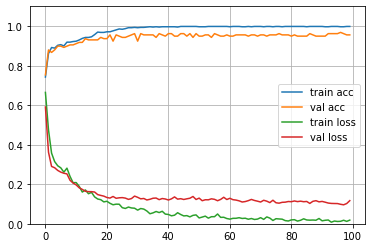

In [9]:
import pandas as pd
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, matthews_corrcoef

epochs=100
batch_size=32

model = KerasClassifier(build_fn=create_second_model_dropout, input_shape=(1004,5), learning_rate=0.01, verbose=1)
history_drop = model.fit(np.array(xTrain.to_list()).reshape(-1,1004,5), yTrain.to_numpy(),
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=0,
                    validation_split=0.2)

yPred = model.predict(np.array(xTest.to_list()).reshape(-1,1004,5))
print(classification_report( yTest.to_list(), yPred ))
print("MCC: ", matthews_corrcoef(yTest.to_list(), yPred))

plot_history(history_drop)

## Retrain the model
<b>Train the model using parameters found normally in a grid search. Due to to much RAM need we skip it and you can change the parameter (learning_rate and dropout). Plot all metrics in the training history and print out classification report and MCC for the test data</b>

In [10]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, matthews_corrcoef

epochs=60
batch_size=32

###please change the learning_rate and dropout from above marked with XXXX

model = KerasClassifier(build_fn=create_second_model_dropout, input_shape=(1004,5), learning_rate=XXXX, dropout=XXXX, verbose=0)
history2 = model.fit(np.array(xTrain.to_list()).reshape(-1,1004,5), yTrain.to_numpy(),
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=0,
                    validation_split=0.2)

yPred = model.predict(np.array(xTest.to_list()).reshape(-1,1004,5))
print(classification_report( yTest.to_list(), yPred ))
print("MCC: ", matthews_corrcoef(yTest.to_list(), yPred))

NameError: name 'create_second_model_dropout' is not defined

In [11]:
plot_history(history2)

NameError: name 'history2' is not defined

## N fold cross validation
For an assessment of the stability perform a n-fold cross validation. Train for a maximum of 50 epochs.<br>
<b>Collect the the training history, MCC, F1 score and accuracy from each round and calculate their mean values</b>

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import matthews_corrcoef, f1_score, accuracy_score

###splits represents the n fold cross validation and should be changed

epochs=50
splits=XXXX
#to save scores
df_scores = pd.DataFrame(columns=["mcc", "f1","acc"])
df_scores.index.name = "Round"

# to save histories
histories = []

# define 10-fold cross validation test 
kfold = StratifiedKFold(n_splits=splits, shuffle=True)

for i, (train_index, test_index) in enumerate(kfold.split(xTrain, yTrain)):
    
    # get the splits
    X_train, X_test = xTrain.iloc[train_index], xTrain.iloc[test_index]
    y_train, y_test = yTrain.iloc[train_index], yTrain.iloc[test_index]

    # train one hot 
    model_cv = KerasClassifier(build_fn=create_second_model_dropout, input_shape=(1004,5), learning_rate=0.01, dropout=0.5, verbose=0)
    hist = model_cv.fit(np.array(X_train.to_list()).reshape(-1,1004,5), y_train.to_numpy(), epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2) # start training
    yPred = model_cv.predict(np.array(X_test.to_list()).reshape(-1,1004,5))
    
    # save predictions
    df_scores.loc[i] = [matthews_corrcoef(y_test.to_list(), yPred),
                        f1_score(y_test.to_list(), yPred),
                        accuracy_score(y_test.to_list(), yPred)]
    # save history
    histories.append(hist)
    
    print("Finished round {}".format(i))
    
df_scores.loc['mean'] = df_scores.mean()
df_scores

NameError: name 'create_second_model_dropout' is not defined

<b>Plot the training histories.</b>

In [ ]:
ax = plt.subplot()

for history in histories:
    ax.plot(history.history['accuracy'], label='train acc', color="blue", alpha=0.2)
    ax.plot(history.history['val_accuracy'], label='val acc', color="orange", alpha=0.2)
    ax.plot(history.history['loss'], label='train loss', color="green", alpha=0.2)
    ax.plot(history.history['val_loss'], label='val loss', color="red", alpha=0.2)
ax.set_ylim(0,1.1)
ax.grid(True)
#plt.legend()
plt.show()

## Confirm with test data
<b>Train the model without using a validation split and confirm the cross validation results on our test data</b>

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, matthews_corrcoef

epochs=20
batch_size=32

model = KerasClassifier(build_fn=create_second_model_dropout, input_shape=(1004,5), learning_rate=0.01, verbose=0)
history_drop = model.fit(np.array(xTrain.to_list()).reshape(-1,1004,5), yTrain.to_numpy(),
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=0)

yPred = model.predict(np.array(xTest.to_list()).reshape(-1,1004,5))
print(classification_report( yTest.to_list(), yPred ))
print("MCC: ", matthews_corrcoef(yTest.to_list(), yPred))

## GOTO 04 # it's all you from here on 